In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df=pd.read_csv(r"D:\online_advertising_performance_data.csv")
df=df.drop(['Unnamed: 12','Unnamed: 13'],axis=1)
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000


In [14]:
df['Day'] = pd.to_datetime(df['month'].astype(str) + '/' + df['day'].astype(str) + '/2020')
df = df.drop(columns=['month', 'day'])
df

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Day
0,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2020-04-01
1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2020-04-01
2,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2020-04-01
3,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2020-04-01
4,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...
15403,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,2020-04-01
15404,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,2020-04-01
15405,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,2020-06-29
15406,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,2020-06-29


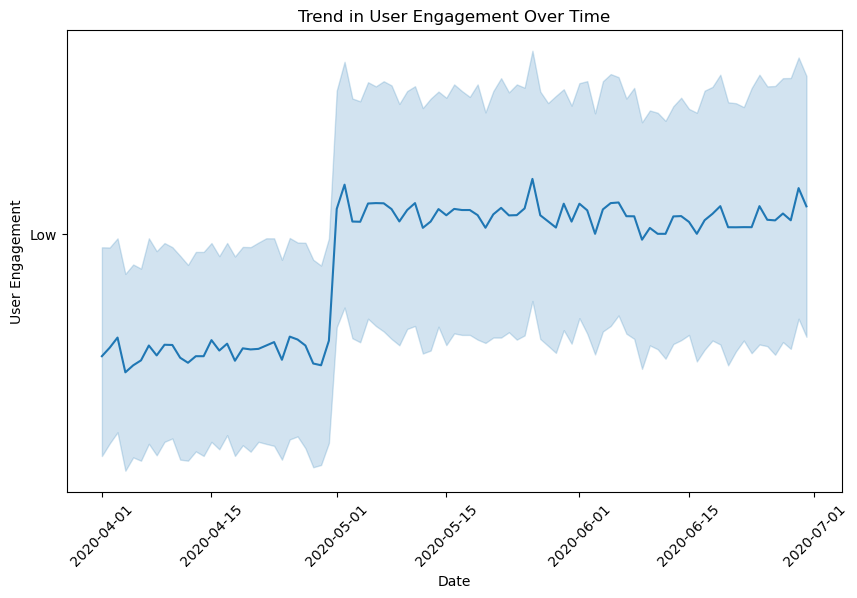

In [15]:
#Overall trend in user engagement throughout the campaign period:
# Plot user engagement over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='user_engagement', data=df)
plt.title('Trend in User Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('User Engagement')
plt.xticks(rotation=45)
plt.show()

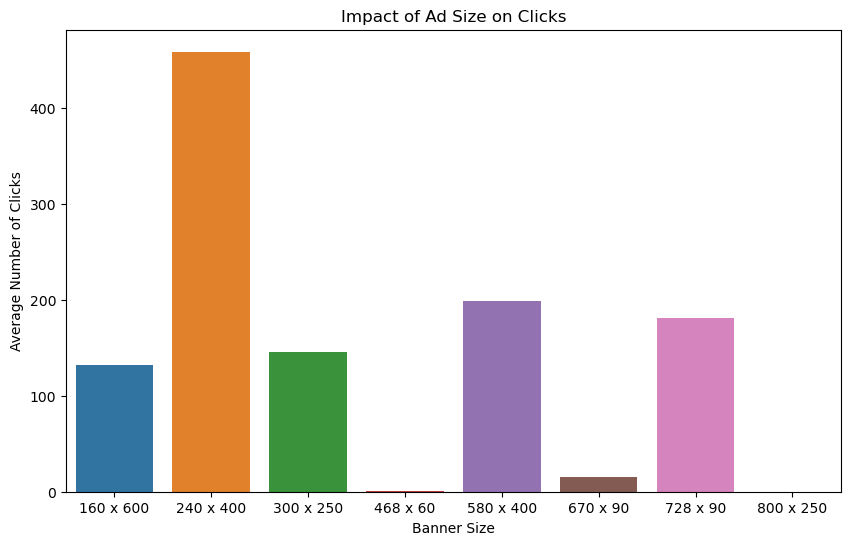

In [16]:
#Impact of ad size (banner) on the number of clicks generated:
banner_clicks = df.groupby('banner')['clicks'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='banner', y='clicks', data=banner_clicks)
plt.title('Impact of Ad Size on Clicks')
plt.xlabel('Banner Size')
plt.ylabel('Average Number of Clicks')
plt.show()

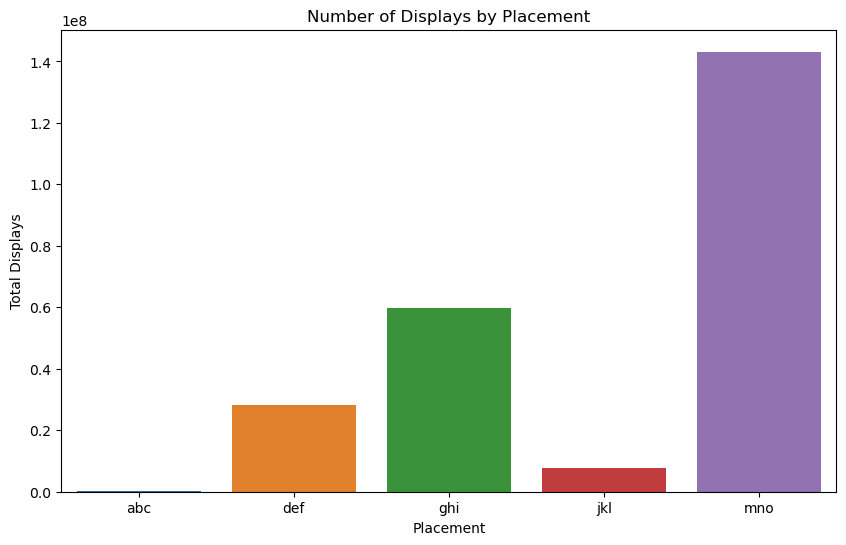

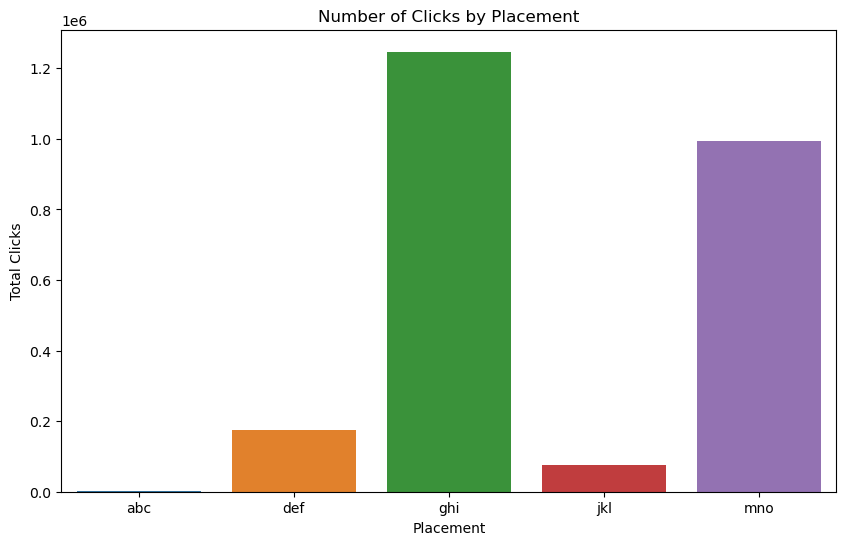

In [17]:
#Publisher spaces (placements) yielding the highest number of displays and clicks:
placement_metrics = df.groupby('placement')[['displays', 'clicks']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='placement', y='displays', data=placement_metrics)
plt.title('Number of Displays by Placement')
plt.xlabel('Placement')
plt.ylabel('Total Displays')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='placement', y='clicks', data=placement_metrics)
plt.title('Number of Clicks by Placement')
plt.xlabel('Placement')
plt.ylabel('Total Clicks')
plt.show()

Correlation between Cost and Revenue: 0.7605199343382227


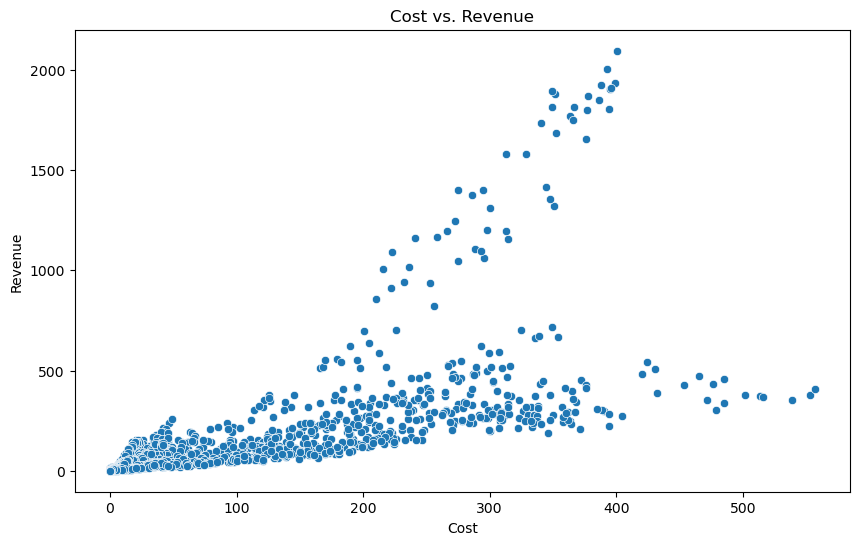

In [18]:
#Correlation between cost of serving ads and revenue generated from clicks:
correlation = df[['cost', 'revenue']].corr().iloc[0, 1]
print(f'Correlation between Cost and Revenue: {correlation}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='revenue', data=df)
plt.title('Cost vs. Revenue')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

In [19]:
#Average revenue generated per click for Company X during the campaign period:
df['Revenue_per_Click'] = df['revenue'] / df['clicks']
average_revenue_per_click = df['Revenue_per_Click'].mean()
print(f'Average Revenue per Click: ${average_revenue_per_click:.2f}')

Average Revenue per Click: $0.09


In [20]:
#Campaigns with the highest post-click conversion rates:
df['Post_Click_Conversion_Rate'] = df['post_click_conversions'] / df['clicks']
campaign_conversion_rate = df.groupby('campaign_number')['Post_Click_Conversion_Rate'].mean().reset_index()
top_campaigns = campaign_conversion_rate.sort_values(by='Post_Click_Conversion_Rate', ascending=False).head(10)
print(top_campaigns)

  campaign_number  Post_Click_Conversion_Rate
2          camp 3                    0.045453
1          camp 2                    0.020079
0          camp 1                         NaN


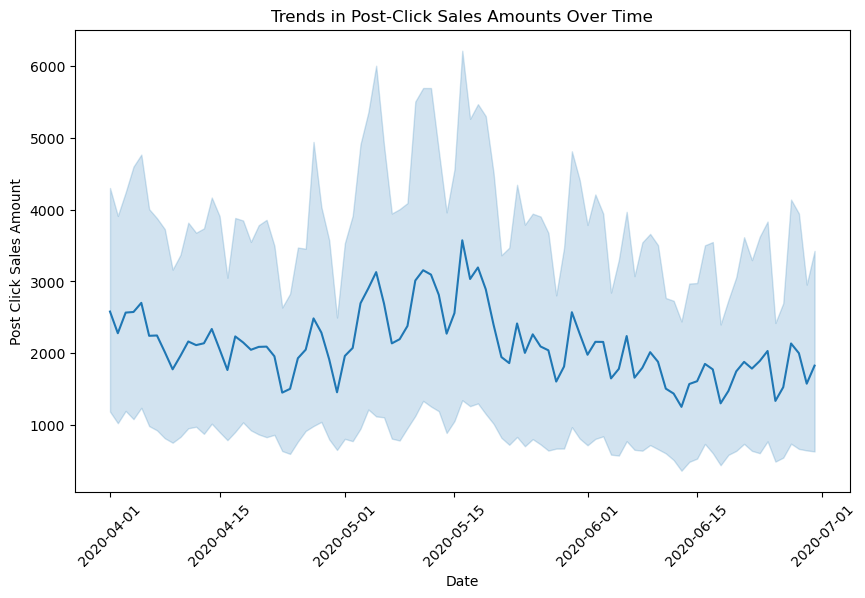

In [21]:
#Trends or patterns in post-click sales amounts over time:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='post_click_sales_amount', data=df)
plt.title('Trends in Post-Click Sales Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Post Click Sales Amount')
plt.xticks(rotation=45)
plt.show()

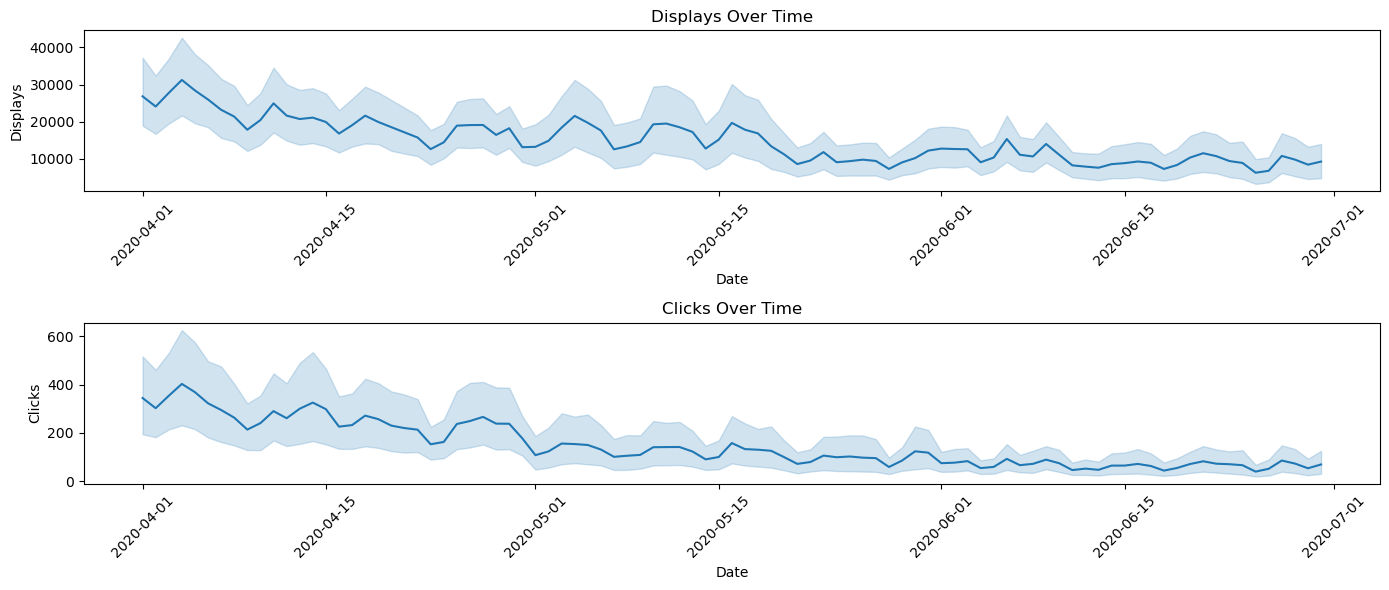

In [24]:
#Seasonal patterns or fluctuations in displays and clicks throughout the campaign period:
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
sns.lineplot(x='Day', y='displays', data=df)
plt.title('Displays Over Time')
plt.xlabel('Date')
plt.ylabel('Displays')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.lineplot(x='Day', y='clicks', data=df)
plt.title('Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Correlation between User Engagement and Revenue: 0.17538924269502967


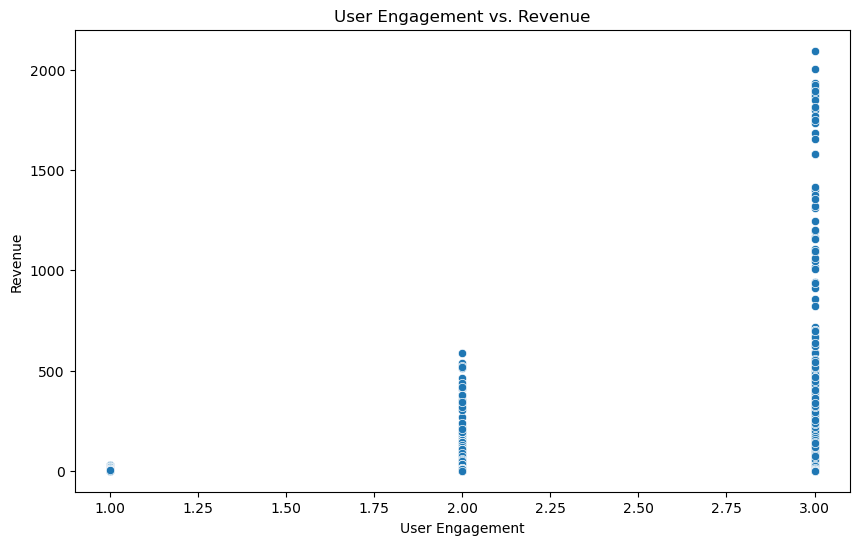

In [30]:
#Correlation between user engagement levels and revenue generated:
engagement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['user_engagement'] = df['user_engagement'].map(engagement_mapping)
correlation_engagement_revenue = df[['user_engagement', 'revenue']].corr().iloc[0, 1]
print(f'Correlation between User Engagement and Revenue: {correlation_engagement_revenue}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_engagement', y='revenue', data=df)
plt.title('User Engagement vs. Revenue')
plt.xlabel('User Engagement')
plt.ylabel('Revenue')
plt.show()

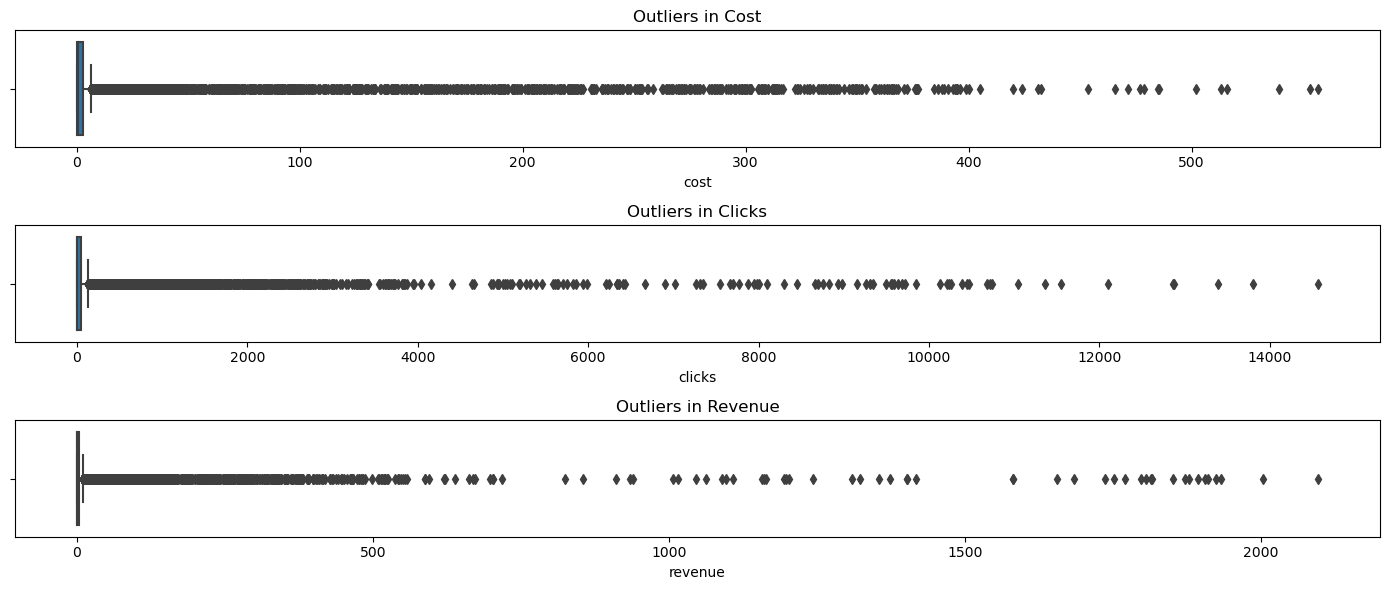

In [26]:
#Outliers in terms of cost, clicks, or revenue:
plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
sns.boxplot(x='cost', data=df)
plt.title('Outliers in Cost')
plt.subplot(3, 1, 2)
sns.boxplot(x='clicks', data=df)
plt.title('Outliers in Clicks')
plt.subplot(3, 1, 3)
sns.boxplot(x='revenue', data=df)
plt.title('Outliers in Revenue')
plt.tight_layout()
plt.show()

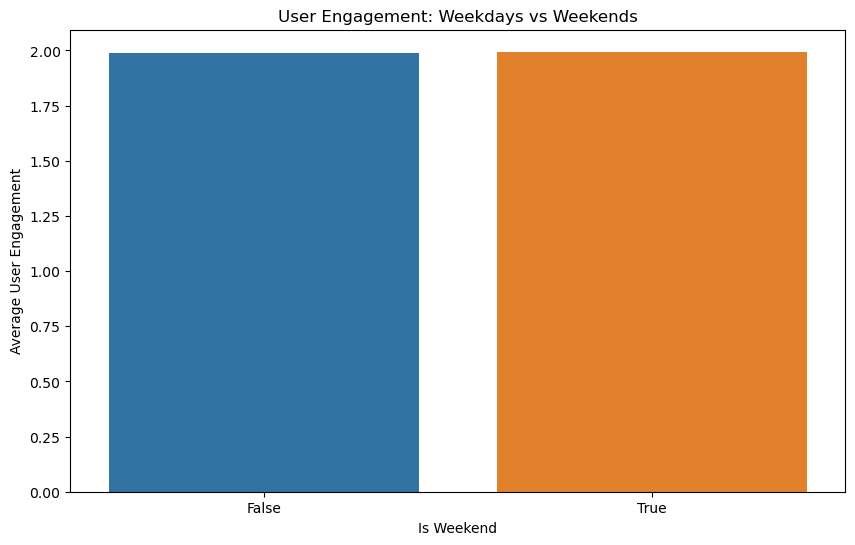

In [32]:
#Differences in user engagement levels between weekdays and weekends:
df['Day_of_Week'] = df['Day'].dt.day_name()
df['Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])
weekend_engagement = df.groupby('Weekend')['user_engagement'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekend', y='user_engagement', data=weekend_engagement)
plt.title('User Engagement: Weekdays vs Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Average User Engagement')
plt.show()

In [27]:
#Campaigns or banner sizes that consistently outperform others in terms of ROI:
df['ROI'] = df['revenue'] / df['cost']
roi_metrics = df.groupby(['campaign_number', 'banner'])['ROI'].mean().reset_index()
top_roi = roi_metrics.sort_values(by='ROI', ascending=False).head(10)
print(top_roi)

   campaign_number     banner       ROI
16          camp 3  160 x 600  4.096757
0           camp 1  160 x 600  3.931911
12          camp 2  580 x 400  3.113678
20          camp 3  580 x 400  3.004255
1           camp 1  240 x 400  2.531187
2           camp 1  300 x 250  2.171725
4           camp 1  580 x 400  2.070334
9           camp 2  240 x 400  1.906611
13          camp 2   670 x 90  1.851741
21          camp 3   670 x 90  1.803126


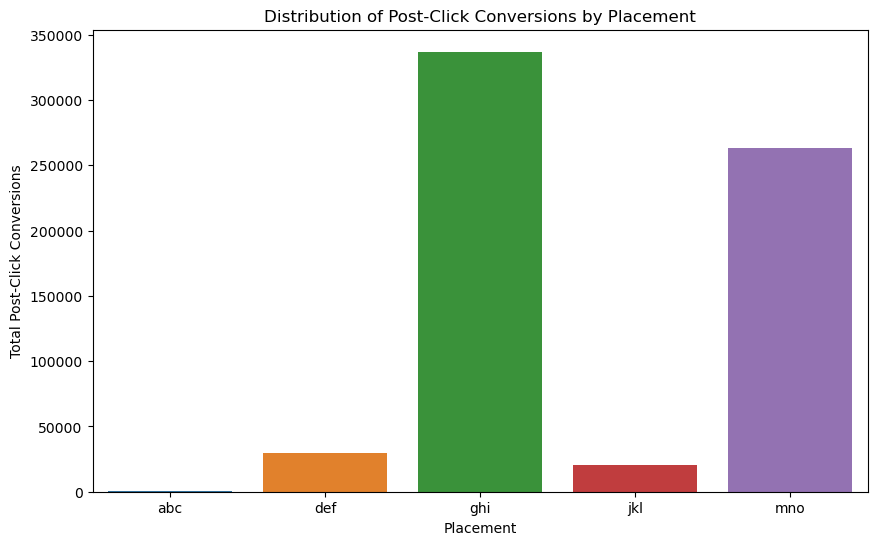

In [28]:
#Distribution of post-click conversions across different placement types:
placement_conversions = df.groupby('placement')['post_click_conversions'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='placement', y='post_click_conversions', data=placement_conversions)
plt.title('Distribution of Post-Click Conversions by Placement')
plt.xlabel('Placement')
plt.ylabel('Total Post-Click Conversions')
plt.show()

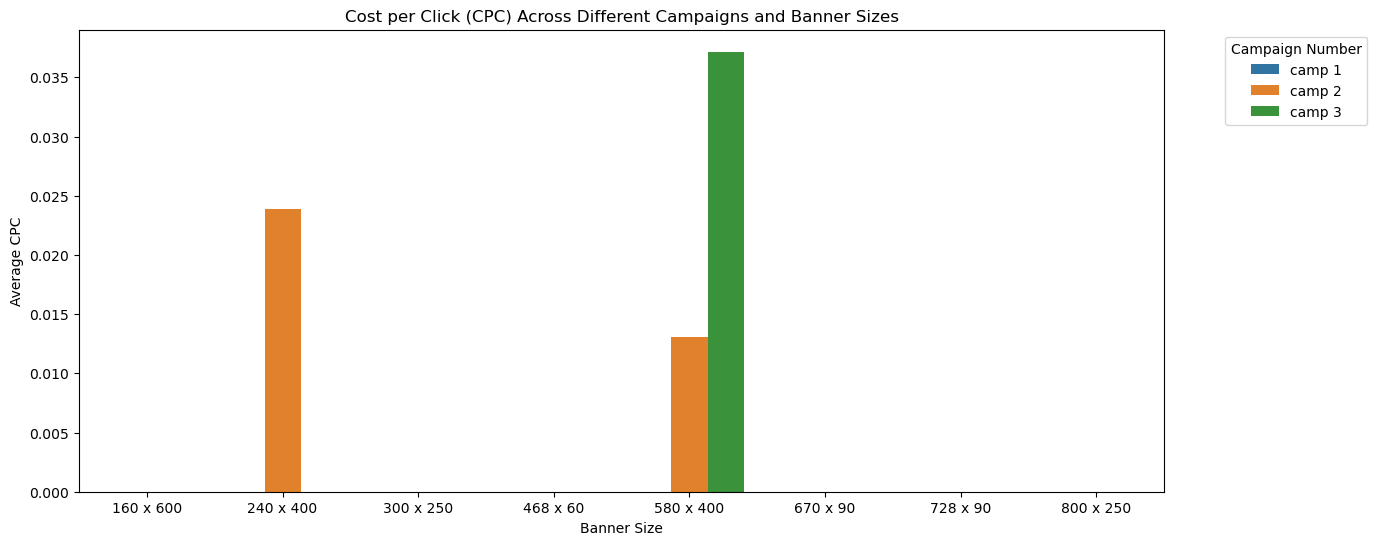

In [31]:
#Cost per click (CPC) variation across different campaigns and banner sizes:
df['CPC'] = df['cost'] / df['clicks']
cpc_metrics = df.groupby(['campaign_number', 'banner'])['CPC'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='banner', y='CPC', hue='campaign_number', data=cpc_metrics)
plt.title('Cost per Click (CPC) Across Different Campaigns and Banner Sizes')
plt.xlabel('Banner Size')
plt.ylabel('Average CPC')
plt.legend(title='Campaign Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()